# 导言区

In [1]:
import numpy as np
import scipy.constants as sc
from CoolProp.CoolProp import PropsSI as psi
import sympy as sp
from sympy import symbols, diff, Function, dsolve, solve, pi, integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt
from Appendix import Appendix5_air_physical_properties as ap5
from Appendix.Appendix4_lambda_ import get_lambda_
from Functions.SteadyStateConduction import *
from Functions.UnsteadyStateConduction import *
from Appendix import Appendix4_lambda_ as ap4
from scipy.integrate import solve_bvp
from scipy.special import iv
from Functions.Self_defined import find_nearest

## 习题02-01

In [2]:
t_boiler = 111
q = 42400
delta = 3e-3
lambda_ = 1

t = root(lambda t: q - lambda_ * (t - t_boiler) / delta,
         t_boiler + 10).x[0]
print(f't = {t:.2f} C')

t = 238.20 C


## 习题02-02

In [3]:
delta_1, delta_2, delta_3 = 0.794e-3, 152e-3, 9.5e-3
lambda_1, lambda_2, lambda_3 = 45, 0.07, 0.1
area = 37.2
t_in = -2
t_out = 30
h_in = 1.5
h_out = 2.5

tau = 1*3600

R_1 = delta_1 / (lambda_1 * area)
R_2 = delta_2 / (lambda_2 * area)
R_3 = delta_3 / (lambda_3 * area)
R_in = 1 / (h_in * area)
R_out = 1 / (h_out * area)
R_total = R_1 + R_2 + R_3 + R_in + R_out

q = (t_out - t_in) / R_total
Q = q * tau
print(f'Q = {Q:.2f} J')

Q = 1285717.03 J


## 习题02-03

In [4]:
delta = 20e-3
lambda_ = 1.3
q = 1500
lambda_insu = 0.08
t_in = 750
t_out = 55

R_1 = delta / lambda_
R_total = (t_in - t_out) / q
R_2 = R_total - R_1
delta_insu = lambda_insu * R_2
print(f'保温层的厚度为 {delta_insu*1000:.0f} mm')

保温层的厚度为 36 mm


## 习题02-04

In [5]:
delta_ratio_A_B = 2
lambda_A = 0.08
lambda_B = 0.05
t_f1 = 400
h_1 = 50
t_w = 50
t_f2 = 25
h_2 = 9.5

q = h_2 * (t_w - t_f2)


def expressions(p):
    delta_A, delta_B, R_total = p
    expr1 = delta_A - delta_B * delta_ratio_A_B
    expr2 = R_total - 1/h_1 - 1/h_2 - delta_A/lambda_A - delta_B/lambda_B
    expr3 = q - (t_f1 - t_f2) / R_total
    return expr1, expr2, expr3


guess_value = (0.02, 0.01, 1)
delta_A, delta_B, R_total = root(expressions, guess_value).x
print(f'delta_A = {delta_A:.3f} m')
print(f'delta_B = {delta_B:.3f} m')

delta_A = 0.065 m
delta_B = 0.032 m


## 例题02-06

In [6]:
d_o = 130e-3
delta = 2.1e-3
lambda_ = 23.2
t_o = 240
q = 4.8e6
t_i_max = 700

delta_t = q * delta / lambda_
t_i = t_o + delta_t
if t_i < t_i_max:
    print('该燃烧室工作于安全温度范围内')
else:
    print('该燃烧室工作于安全温度范围外')

该燃烧室工作于安全温度范围内


## 例题02-07

In [7]:
P_total = 1000
eta = 85/100
delta = 3e-3
d = 200e-3
lambda_ = 18
h = 2500
t_f = 95

P = P_total * eta
area = np.pi * d**2 / 4
R_1 = 1 / (h * area)
R_2 = delta / lambda_
R = R_1 + R_2
t_bot = t_f + P * R
t_top = t_f + P * R_1
print(f't_bot = {t_bot:.2f} C')
print(f't_top = {t_top:.2f} C')

t_bot = 105.96 C
t_top = 105.82 C


## 例题02-08

In [8]:
t_h = 400
t_c = 300
Delta_t = 2.49
Delta_t1 = 3.56
Delta_t2 = 3.60

q, A, l, lambda_, lambda_1, lambda_2 = symbols('q A l lambda_ lambda_1 lambda_2')

xpr1 = q - Delta_t1 * A * lambda_1 / l
xpr2 = q - Delta_t2 * A * lambda_2 / l
xpr3 = q - Delta_t * A * lambda_ / l

result = solve([xpr1, xpr2, xpr3], [lambda_1, lambda_, lambda_2])
lambda_ = 2 * result[lambda_] / (result[lambda_1] + result[lambda_2]) * lambda_1
print(f'lambda_ = {lambda_}')

if Delta_t1 == Delta_t2:
    print('标准材料的导热系数随温度发生变化时，Delta_t1与Delta_t2相等')
else:
    print('标准材料的导热系数随温度发生变化时，Delta_t1与Delta_t2不等')

lambda_ = 1.43770613178973*lambda_1
标准材料的导热系数随温度发生变化时，Delta_t1与Delta_t2不等


## 例题02-09

In [9]:
delta_1 = delta_2 = 6e-3
delta_air = 8e-3
t_in = 20
t_out = -20
width = length = 60e-2
lambda_ = 0.78

t = (t_in + t_out) / 2
lambda_air = np.interp(t, ap5.temperature_list, ap5.lambda_list)
# 也可以利用CoolProp计算lambda的值
# lambda_air2 = psi('L', 'T', t+273.15, 'P', 101325, 'Air')

area = width * length
R_1 = delta_1 / (lambda_ * area)
R_2 = delta_2 / (lambda_ * area)
R_air = delta_air / (lambda_air * area)

R = R_1 + R_2 + R_air
q = (t_in - t_out) / R
print(f'热损失为{q:.2f} W')

R_p = delta_1 / (lambda_ * area)
q_p = (t_in - t_out) / R_p
times = q_p / q
print(f'其热损失是双层玻璃的{times:.2f}倍')

热损失为41.95 W
其热损失是双层玻璃的44.62倍


## 例题02-10

In [10]:
delta_g = 3e-3
delta_air = 6e-3
lambda_g = 0.8
t_i = 15
t_o = -10

air_pressure = sc.atm


def expressions(p):
    t_12, t_23, t_34, t_45, q, lambda_air1, lambda_air2 = p
    xpr1 = q - (t_i - t_12) * lambda_g / delta_g
    xpr2 = q - (t_12 - t_23) * lambda_air1 / delta_air
    xpr3 = q - (t_23 - t_34) * lambda_g / delta_g
    xpr4 = q - (t_34 - t_45) * lambda_air2 / delta_air
    xpr5 = q - (t_45 - t_o) * lambda_g / delta_g
    xpr6 = lambda_air1 - psi('L', 'T', sc.convert_temperature(((t_12 + t_23) / 2), 'C', 'K'), 'P', air_pressure, 'Air')
    xpr7 = lambda_air2 - psi('L', 'T', sc.convert_temperature(((t_34 + t_45) / 2), 'C', 'K'), 'P', air_pressure, 'Air')
    return [xpr1, xpr2, xpr3, xpr4, xpr5, xpr6, xpr7]


guess_value = [t_i- 1, t_i-2, t_i-3, t_i-4, 1, lambda_g, lambda_g]
t_12, t_23, t_34, t_45, q, lambda_air1, lambda_air2 = root(expressions, guess_value).x
print(f'q = {q:.2f} W/m^2')

q = 49.99 W/m^2


## 例题02-11

In [11]:
lambda_ceramics = 1.3
t_max = 1250
lambda_alloy = 25
R_c = 1e-4  # m^2-K/W
t_gas = 1700
h_gas = 1000
t_air = 400
h_air = 500
delta_ceramics = 1e-3   # 缺失
delta_alloy = 1e-3  # 缺失

R_1 = 1 / h_gas
R_2 = delta_ceramics / lambda_ceramics  # 缺少条件：陶瓷层的厚度
R_3 = delta_alloy / lambda_alloy    # 缺少条件：合金层的厚度
R_4 = 1 / h_air
R_total = R_1 + R_2 + R_c + R_3 + R_4

q = (t_gas - t_air) / R_total
t_alloy_max = t_air + q * (R_3 + R_4)
print(f'合金的最高温度为 {t_alloy_max:.2f} C。')

if t_alloy_max > t_max:
    print('合金不能安全地工作')
else:
    print('合金可以安全地工作')

合金的最高温度为 1078.39 C。
合金可以安全地工作


## 习题02-12

In [12]:
delta_s = 1e-3  # 基板的厚度
delta_f = 0.2e-3    # 薄膜的厚度
t_f = 20
h = 40
t_1 = 30
t_0 = 60
lambda_f = 0.02
lambda_s = 0.06

R_1 = 1 / h
R_2 = delta_f / lambda_f


def expressions(p):
    q_1, t_2 = p
    xpr1 = q_1 - h * (t_2 - t_f)
    xpr2 = q_1 - (t_0 - t_2) * lambda_f / delta_f
    return [xpr1, xpr2]


guess_values = [1, t_0 - 10]
q_1, t_2 = root(expressions, guess_values).x
q_2 = (t_0 - t_1) * lambda_s / delta_s
# 在薄膜与基板的接触面处能量守恒
q = q_1 + q_2
print(f'q = {q:.2f} W/m^2')

q = 2942.86 W/m^2


## 习题02-13

In [13]:
Delta = 0.1e-3
t_1 = 180
t_2 = 30
fluid = 'Air'
Phi = 58.2
d = 120e-3

p = sc.atm
T_1 = sc.convert_temperature(t_1, 'C', 'K')
T_2 = sc.convert_temperature(t_2, 'C', 'K')

lambda_1 = psi('L', 'T', T_1, 'P', p, fluid)
lambda_2 = psi('L', 'T', T_2, 'P', p, fluid)

area = np.pi * d**2 / 4    # 纵向单位长度的传热面积
q = Phi / area
R_total = (t_1 - t_2) / q
R_1 = Delta / lambda_1
R_2 = Delta / lambda_2
R = R_total - R_1 - R_2

error = R_total - R
error_ratio = error / R

print(f'相对误差大小为{error_ratio:.2%}')

相对误差大小为28.48%


## 习题02-14

In [14]:
d = 100e-3
density = 20
t_o = 400
t_insu = 50
Phi = 163
material = '超细玻璃棉毡、管'
lambda_insu = get_lambda_(material, (t_o + t_insu) / 2)
R_insu = (t_o - t_insu) / Phi
lambda_insu = get_lambda_(material, (t_o + t_insu) / 2)

guess_value = d
delta = root(lambda delta: R_insu - cylindrical_wall_R(d/2, d/2 + delta, lambda_insu, 1), guess_value).x[0]
print(f'delta = {delta:.3f} m')

delta = 0.107 m


## 习题02-15

In [15]:
d_1 = 50e-3
delta_1 = 40e-3
lambda_1 = 0.11
delta_2 = 45e-3
lambda_2 = 0.12
t_o = 50
t_i = 400
material1 = '矿渣棉'
material2 = '粉煤灰泡沫砖'

idx1 = ap4.material_list.index(material1)
idx2 = ap4.material_list.index(material2)
t_12_max = min(ap4.t_max[idx1], ap4.t_max[idx2])

R_1 = cylindrical_wall_R(d_1/2, d_1/2+delta_1, lambda_1, 1)
R_2 = cylindrical_wall_R(d_1/2+delta_1, d_1/2+delta_1+delta_2, lambda_2, 1)
R = R_1 + R_2
q = (t_i - t_o) / R
t_12 = t_o + q * R_2
if t_12 > t_12_max:
    print('矿渣棉与煤灰泡沫砖交界界面处的温度超过允许值')
else:
    print('矿渣棉与煤灰泡沫砖交界界面处的温度不超过允许值')

R_2, delta_2 = sp.symbols('R_2 delta_2')
r2 = d_1/2 + delta_1 + delta_2
r1 = d_1/2 + delta_1
length = 1
R_2 = sp.log(r2/r1) / (2*np.pi*lambda_2*length)
dR_2_ddelta_2 = sp.diff(R_2, delta_2).subs(delta_2, 0.045)
if dR_2_ddelta_2 > 0:
    print('增加煤灰泡沫砖的厚度会导致热损失下降')
else:
    print('增加煤灰泡沫砖的厚度会导致热损失增加')

矿渣棉与煤灰泡沫砖交界界面处的温度不超过允许值
增加煤灰泡沫砖的厚度会导致热损失下降


## 习题02-16

In [16]:
d = 3e-3
R_e = 2.22e-3 # Ohm per meter
delta = 1e-3
lambda_ = 0.15
t_max = 65
t_min = 0

R = cylindrical_wall_R(d/2, d/2+delta, lambda_, 1)
Phi = (t_max - t_min) / R
I = np.sqrt(Phi / R_e)
print(f'I = {I:.2f} A')

I = 232.42 A


## 习题02-17

In [17]:
t_gas = 1000
t_water = 200
h_o = 100
h_i = 5000
delta = 6e-3
lambda_ = 42
d_o = 52e-3

delta_dirty = [0, 1e-3, 2e-3]
lamdba_dirty = [1, 0.08, 1]

d_i = d_o - 2*delta
d_o = d_o
R_1 = 1 / (h_i * np.pi * d_i)
R_2 = cylindrical_wall_R(d_i/2, d_o/2, lambda_, 1)

for i, delta_d in enumerate(delta_dirty):
    lambda_d = lamdba_dirty[i]
    R_3 = cylindrical_wall_R(d_o/2, d_o/2 + delta_d, lambda_d, 1)
    R_4 = 1 / (h_o * np.pi * (d_o + delta_d))
    R_total = R_1 + R_2 + R_3 + R_4
    q = (t_gas - t_water) / R_total
    print(f'({i+1}) q = {q:.2f} W')

(1) q = 12539.34 W
(2) q = 5808.63 W
(3) q = 10910.08 W


## 习题02-18

In [18]:
d = 100e-3
lambda_1 = 0.05
lambda_2 = 0.08
delta_1 = delta_2 = 75e-3

R_1i = cylindrical_wall_R(d/2, d/2+delta_1, lambda_1, 1)
R_1o = cylindrical_wall_R(d/2+delta_1, d/2+delta_1+delta_2, lambda_1, 1)
R_2i = cylindrical_wall_R(d/2, d/2+delta_2, lambda_2, 1)
R_2o = cylindrical_wall_R(d/2+delta_2, d/2+delta_2+delta_1, lambda_2, 1)

R_1 = R_1i + R_1o
R_2 = R_2i + R_2o

if R_1 > R_2:
    print(f'导热系数小的材料紧贴管壁保温效果更好')
else:
    print(f'导热系数大的材料紧贴管壁保温效果更好')

导热系数小的材料紧贴管壁保温效果更好


## 习题02-19

In [19]:
d = 30e-3
t = 100
t_amb = 20
Phi_l1 = 100   # W/m
Phi_l2 = 50    # W/m, aim

area = np.pi * d

h = Phi_l1 / ((t - t_amb) * area)

lambda_A = 0.5
v_l_A = 3.14e-3
lambda_B = 0.1
v_l_B = 4.0e-3


def find_outer_radius(r_in, area):
    r_out = np.sqrt(area / np.pi + r_in**2)
    return r_out


# 第一种方案，先敷设材料A，再敷设材料B
r_1 = find_outer_radius(d/2, v_l_A)
r_2 = find_outer_radius(r_1, v_l_B)

R_1 = cylindrical_wall_R(d/2, r_1, lambda_A, 1)
R_2 = cylindrical_wall_R(r_1, r_2, lambda_B, 1)
area_out = np.pi * r_2 * 2
R_3 = 1 / (h * area_out)

R = R_1 + R_2 + R_3
Phi_l_A = (t - t_amb) / R

# 第二种方案，先敷设材料B，再敷设材料A
r_1 = find_outer_radius(d/2, v_l_B)
r_2 = find_outer_radius(r_1, v_l_A)

R_1 = cylindrical_wall_R(d/2, r_1, lambda_B, 1)
R_2 = cylindrical_wall_R(r_1, r_2, lambda_A, 1)
area_out = np.pi * r_2 * 2
R_3 = 1 / (h * area_out)

R = R_1 + R_2 + R_3
Phi_l_B = (t - t_amb) / R

if Phi_l_A < Phi_l2 and Phi_l_B < Phi_l2:
    print('两种方案都可行')
elif Phi_l_A < Phi_l2:
    print('先案敷设材料A，再敷设材料B')
elif Phi_l_B < Phi_l2:
    print('先案敷设材料B，再敷设材料A')
else:
    print('两种方案都不可行')

先案敷设材料B，再敷设材料A


## 习题02-20

In [20]:
d, l, t_1, t_2, t_f, lambda_, h = symbols('d, l, t_1, t_2, t_f, lambda_, h')
x = symbols('x')
t = Function('t')

eq1 = diff(t(x), x, 2)
result = dsolve(eq1, ics={t(0): t_1, t(l): t_2})
t = solve(result, t(x))[0]
print(f'(1) t(x) = {t}')

t = Function('t')
eq2 = diff(t(x), x, 2) - 4 * h / (d * lambda_) * (t(x) - t_f)
result = dsolve(eq2, ics={t(0): t_1, t(l): t_2})
t = solve(result, t(x))[0]
print(f'(2) t(x) = {t}')

(1) t(x) = (l*t_1 - t_1*x + t_2*x)/l
(2) t(x) = (t_1*exp(4*l*sqrt(h/(d*lambda_))) - t_1*exp(4*x*sqrt(h/(d*lambda_))) - t_2*exp(2*l*sqrt(h/(d*lambda_))) + t_2*exp(2*sqrt(h/(d*lambda_))*(l + 2*x)) - t_f*exp(4*l*sqrt(h/(d*lambda_))) + t_f*exp(2*l*sqrt(h/(d*lambda_))) + t_f*exp(4*x*sqrt(h/(d*lambda_))) - t_f*exp(2*x*sqrt(h/(d*lambda_))) - t_f*exp(2*sqrt(h/(d*lambda_))*(l + 2*x)) + t_f*exp(2*sqrt(h/(d*lambda_))*(2*l + x)))*exp(-2*x*sqrt(h/(d*lambda_)))/(exp(4*l*sqrt(h/(d*lambda_))) - 1)


## 习题02-21

In [21]:
d, l, t_1, t_2, t_f, lambda_, h = symbols('d, l, t_1, t_2, t_f, lambda_, h')
x = symbols('x')

# eq1 = diff(t(x), x, 2)
# result = dsolve(eq1, ics={t(0): t_1, t(l): t_2})
# t = solve(result, t(x))[0]
# print(f'(1) t(x) = {t}')

t = Function('t')
eq2 = diff(t(x), x, 2) - 4 * h / (d * lambda_) * (t(x) - t_f)
result = dsolve(eq2, ics={t(0): t_1, t(l): t_2})
t = solve(result, t(x))[0]
print(f't(x) = {t}')

d = 20e-3
l = 300e-3
t_1 = 250
t_2 = 60
t_f = 30

h = 10
lambda_ = 40

area = np.pi * d ** 2 / 4
phi = - lambda_ * diff(t, x, 1) * area
phi_1 = phi.subs([(symbols('d'), d), (symbols('l'), l), (symbols('t_1'), t_1), (symbols('t_2'), t_2),
                  (symbols('t_f'), t_f), (symbols('h'), h), (symbols('lambda_'), lambda_), (symbols('x'), 0)])
phi_2 = phi.subs([(symbols('d'), 20e-3), (symbols('l'), l), (symbols('t_1'), t_1), (symbols('t_2'), t_2),
                  (symbols('t_f'), 30), (symbols('h'), h), (symbols('lambda_'), lambda_), (symbols('x'), l)])
phi_total = phi_1 + phi_2
print(f'钢柱体单位时间从两个热源分别获得的热量为:{phi_1:.2f} W 和{phi_2:.2f} W，总计{phi_total:.2f} W。')

t(x) = (t_1*exp(4*l*sqrt(h/(d*lambda_))) - t_1*exp(4*x*sqrt(h/(d*lambda_))) - t_2*exp(2*l*sqrt(h/(d*lambda_))) + t_2*exp(2*sqrt(h/(d*lambda_))*(l + 2*x)) - t_f*exp(4*l*sqrt(h/(d*lambda_))) + t_f*exp(2*l*sqrt(h/(d*lambda_))) + t_f*exp(4*x*sqrt(h/(d*lambda_))) - t_f*exp(2*x*sqrt(h/(d*lambda_))) - t_f*exp(2*sqrt(h/(d*lambda_))*(l + 2*x)) + t_f*exp(2*sqrt(h/(d*lambda_))*(2*l + x)))*exp(-2*x*sqrt(h/(d*lambda_)))/(exp(4*l*sqrt(h/(d*lambda_))) - 1)
钢柱体单位时间从两个热源分别获得的热量为:19.47 W 和2.01 W，总计21.48 W。


## 习题02-22

In [22]:
d = 300e-3
delta = 30e-3
lambda_ = 1.8e-4
t = -195.6
t_a = 25
gamma = 199.6e3
time = 1*sc.day

R = spherical_wall_R(d/2, d/2+delta, lambda_)
Phi = (t_a - t) / R
m = Phi * time / gamma
print(f'上述条件下，液氮每天的蒸发量为：{m:.2f} kg')

上述条件下，液氮每天的蒸发量为：0.19 kg


## 习题02-23

In [23]:
d = 2
delta = 1e-2
t = -40
delta_insu = 30e-2
lambda_ = 0.08
t_a = 40
h_insu = 30
number = 10

r_1 = d/2 + delta   # 认为绝缘层内壁温度等于罐内温度，只分析绝缘层的传热
r_2 = d/2 + delta + delta_insu
R = spherical_wall_R(r_1, r_2, lambda_)
Phi = number * (t_a - t) / R
print(f'10 个球罐所必须配备的制冷设备的容量为：{Phi:.2f} W')

10 个球罐所必须配备的制冷设备的容量为：3547.00 W


## 习题02-24

In [24]:
d_i = 0.15
d_o = 0.25
t_i = 200
t_o = 40
P = 56.5

R = P / (t_i - t_o)
guess_value = 1
lambda_ = root(lambda lambda_: R - spherical_wall_R(d_i/2, d_o/2, lambda_), guess_value).x[0]
print(f'lambda = {lambda_:.2f} W/m-K')

lambda = 1.20 W/m-K


In [25]:
## 习题02-25

In [26]:
d_i = 0.5
d_o = 0.6
Phi_dot = 1e5   # W/m^3
h = 1000        # W/m^2-K
t_f = 25
material = '铬镍钢'

temperature_list = [-100, 0, 100, 200, 300, 400, 600, 800]
lambda_list = [12.2, 14.7, 16.6, 18.0, 19.4, 20.8, 23.5, 26.3]


def lambda_(t):
    return np.interp(t, temperature_list, lambda_list)


V = 4/3 * np.pi * (d_i/2)**3
Phi = Phi_dot * V


def expressions(p):
    t_i, t_o = p
    xpr1 = Phi - (t_i - t_o) / spherical_wall_R(d_i/2, d_o/2, lambda_((t_i+t_o)/2))
    xpr2 = Phi - h * np.pi * d_o**2 * (t_o - t_f)
    return [xpr1, xpr2]


guess_values = [t_f + 20, t_f + 10]
t_i, t_o = root(expressions, guess_values).x
print(f'球罐的内表面温度为：{t_i:.2f} C')
print(f'球罐的外表面温度为：{t_o:.2f} C')

球罐的内表面温度为：53.19 C
球罐的外表面温度为：30.79 C


## 习题02-26

In [27]:
delta = 20e-2
lambda_ = 1.5

T_i = 400
t_f = 25
h = 10
r_o = 0.5
l = 2.0

t_i = sc.convert_temperature(T_i, 'K', 'C')

# 可将导热热阻开成球壳热阻和圆柱壳热阻的并联
# 圆柱壳热阻
R_c = cylindrical_wall_R(r_o - delta, r_o, lambda_, l)
# 球壳热阻
R_s = spherical_wall_R(r_o - delta, r_o, lambda_)

R = 1 / (1 / R_c + 1 / R_s)
Phi = (t_i - t_f) / R
print(f'所需的电加热器的功率为：{Phi:.2f} W')

所需的电加热器的功率为：5198.15 W


## 习题02-27

In [28]:
r_1 = 10e-3
r_2 = 12.5e-3
r_3 = 16.3e-3
t_fi = 37
t_fo = 20
h_i = 12
h_o = 6
lambda_1 = 0.35
lambda_2 = 0.8
ratio = 1/3

area_1 = ratio * 4 * np.pi * r_1**2
area_2 = ratio * 4 * np.pi * r_2**2
area_3 = ratio * 4 * np.pi * r_3**2

R_i = 1 / (h_i * area_1)
# 由于球面可看做各部分热阻并联组成，所以热阻等于球壳的热阻除以ratio
R_1 = spherical_wall_R(r_1, r_2, lambda_1) / ratio
R_2 = spherical_wall_R(r_2, r_3, lambda_2) / ratio
R_o = 1 / (h_o * area_2)
R_o_p = 1 / (h_o * area_3)

R_total = R_i + R_1 + R_o
R_total_p = R_i + R_1 + R_2 + R_o_p

Phi = (t_fi - t_fo) / R_total
Phi_p = (t_fi - t_fo) / R_total_p

print(f'Phi = {Phi:.3f} W')
print(f'Phi_p = {Phi_p:.3f} W')

Phi = 0.036 W
Phi_p = 0.046 W


## 习题02-28

In [29]:
d = 1.22
delta = 0.45
lambda_ = 0.043
t_i = -62.2
t_o = 18
h_i = 1050
h_o = 21

#   做出以下假设：
#   1. 结冰的软木保温层由含水层和干软木保温层组成
#   2. 含水层的导热系数取冰的导热系数
#   3. 干软木保温层的导热系数取软木的导热系数
#   4. 含水（冰）软木保温层的厚度与之前相同


def expressions(p):
    delta_ice = p[0]
    r_1 = d / 2
    r_2 = d / 2 + delta_ice # delta_ice <= delta
    r_3 = d / 2 + delta

    area_i = 4 * np.pi * r_1**2
    area_o = 4 * np.pi * r_3**2

    R_i = 1 / (h_i * area_i)
    R_ice = spherical_wall_R(r_1, r_2, lambda_)
    R_wood = spherical_wall_R(r_2, r_3, lambda_)
    R_o = 1 / (h_o * area_o)

    R = R_i + R_ice + R_wood + R_o
    Phi = (t_o - t_i) / R
    t_2 = 0
    xpr = Phi - (t_o - t_2)/(R_wood + R_o)
    return xpr


guess_value = delta/2
delta_ice = root(expressions, guess_value).x[0]
print(f'结冰的冰软木保温层的厚度为：{delta_ice:.3f} m')

结冰的冰软木保温层的厚度为：0.301 m


## 习题02-29

In [30]:
r = 0.1e-3
t_oo = 25
lambda_ = 120
Phi = 4

R = spherical_wall_R(r, np.inf, lambda_)
guess_value = t_oo + 1
t = root(lambda t: Phi - (t - t_oo) / R, guess_value).x[0]
print(f't = {t:.2f} C')

t = 51.53 C


## 习题02-30

In [31]:
height = 30e-2
d_1 = 8.2e-2
d_2 = 13e-2
t_1 = 20
t_2 = 520
lambda_ = 100

A = Function('A')
t = symbols('t')
Phi = symbols('Phi')
y = symbols('y')

eq1 = diff(A(y), y, 2)
A = solve(dsolve(eq1, ics={A(0): pi/4*d_2**2, A(height): pi/4*d_1**2}), A(y))[0]
# Phi = -lambda_*A*diff(t, y)
result1 = integrate(-1/(lambda_ * A), (y, 0, height))
result2 = integrate(1, (t, t_2, t_1))
Phi = result2 / result1
print(f'Phi = {Phi:.2f} W')

Phi = 1445.30 W


## 习题02-31

In [32]:
a_list = np.array([0.506, 0.08, 20.24])
n_list = np.array([0.5, 0.0, 1.5])
x_1 = 25e-3
x_2 = 125e-3

number = len(a_list)
result = np.zeros(number)
for i in range(number):
    a = a_list[i]
    n = n_list[i]

    def func(x):
        d = a*x**n
        area = np.pi / 4 * d**2
        return 1/area
    result[i] = 1 / quad(func, x_1, x_2)[0]

arg = np.argsort(-result)
for i in range(number):
    print(f'第{arg[i]+1}种导热问题热流量排第{i+1}')

第3种导热问题热流量排第1
第1种导热问题热流量排第2
第2种导热问题热流量排第3


## 习题02-32

In [33]:
delta = 25e-3
t_1 = 40
t_2 = 85
phi = 1.82e3
area = 0.2

lambda_ = phi * delta / (area * (t_2 - t_1))
print(f'lambda = {lambda_:.2f}')

# 如果已知平板中间的温度t，则可以得到lmbda的公式

lambda_1 = phi * delta / (area * (t - t_1))
lambda_2 = phi * delta / (area * (t_2 - t))

lambda_0, b = symbols('lambda_0 b')

result = solve([lambda_1 - lambda_0 * (1 + b*(t+t_1)/2), lambda_2 - lambda_0 * (1 + b*(t+t_2)/2)], lambda_0, b)
print(f'lambda_0 = {result[0][0]}')
print(f'b = {result[0][1]}')

lambda = 5.06
lambda_0 = 5.05555555555556*(2.0*t**2 - 8825.0)/((t - 85.0)*(t - 40.0))
b = -2.0*(2.0*t - 125.0)/(2.0*t**2 - 8825.0)


## 习题02-36

In [34]:
q = 1000
delta = 20e-3
x_list = np.array([0, 10e-3, 20e-3])
t_list = np.array([100, 60, 40])


# lambda_ = lambda_0 * (1 + b*t)


def lambda_(delta, delta_t):
    return -q * delta / delta_t


def expressions(p):
    lambda_0, b = p

    def lambda_b(t):
        return lambda_0 * (1 + b * t)

    delta_1 = x_list[1] - x_list[0]
    delta_2 = x_list[2] - x_list[1]
    delta_t_1 = t_list[1] - t_list[0]
    delta_t_2 = t_list[2] - t_list[1]
    t_average_1 = (t_list[1] + t_list[0]) / 2
    t_average_2 = (t_list[2] + t_list[1]) / 2
    xpr1 = lambda_(delta_1, delta_t_1) - lambda_b(t_average_1)
    xpr2 = lambda_(delta_2, delta_t_2) - lambda_b(t_average_2)
    return xpr1, xpr2


guess_values = [1, 1]
lambda_0, b = root(expressions, guess_values).x
print(f'lambda_0 = {lambda_0:.3f} W/m-K')
print(f'b = {b:.3e} K^-1')

lambda_0 = 0.917 W/m-K
b = -9.091e-03 K^-1


## 习题02-41

In [35]:
t_max = 1600
t_water = 110
h = 12000
R_c = 2.2e-4    # m^2-K/W
r_1 = 6.1e-3
r_2 = 6.5e-3
lambda_ = 7.9
lambda_alloy = 14.2


def expressions(p):
    phi = p
    q_dot = phi / (np.pi * r_1**2)
    t_w = t_max - cylinder_Delta_T_with_heat_source(r_1, lambda_, q_dot)
    R_w = cylindrical_wall_R(r_1, r_2, lambda_, 1)
    R_conv = 1 / (h * 2*np.pi*r_2)
    R = R_c / (2*np.pi*r_1) + R_w + R_conv  # R_c的单位表明其需要除以接触面积
    xpr = phi - (t_w - t_water) / R
    return xpr


guess_values = 1e6
phi = root(expressions, guess_values).x[0]
print(f'最大热功率为：{phi:.2f} W')

最大热功率为：77875.46 W


## 习题02-46

In [36]:
# 绝热表面可以看做对称面
delta = 7e-2
t_f = 30
q_dot = 0.3e6
h = 450
lambda_ = 18

Delta_T = plate_wall_Delta_T_with_heat_source(2*delta, lambda_, h, q_dot)
t_max = t_f + Delta_T
print(f't_max = {t_max:.2f} C')

t_max = 117.50 C


## 习题02-50

In [37]:
lambda_ = np.array([208, 41.5])
h = np.array([284, 511])
H = np.array([15.24e-3, 15.24e-3])
delta = np.array([2.54e-3, 2.54e-3])

perimeter = 2
A_c = delta
efficiency = fin_tip_efficiency(H, perimeter, A_c, lambda_, h)
# 也可以用fin_tip_efficiency2函数求解
# A_L = delta * H
# efficiency2 = fin_tip_efficiency2(H, A_L, lambda_, h)
np.set_printoptions(formatter={'float': '{:.2%}'.format})
for i, eta in enumerate(efficiency):
    print(f'({i+1}) eta = {eta:.2%}')

(1) eta = 92.43%
(2) eta = 60.33%


## 习题02-51

In [38]:
material = 'Al'
t_w = 260
d = 25e-3
H = 150e-3
t_1 = 16
h = 15

perimeter = np.pi * d
A_c = np.pi * d**2 / 4
lambda_ = 208   # 采用上一题给出Al的导热系数

R = fin_tip_R(H, perimeter, A_c, lambda_, h)
Phi = (t_w - t_1) / R
print(f'Phi2 = {Phi:.2f} W')

H_2 = 2*H
R_2 = fin_tip_R(H_2, perimeter, A_c, lambda_, h)
Phi_2 = (t_w - t_1) / R_2
print(f'Phi2 = {Phi_2:.2f} W')

Phi2 = 39.74 W
Phi2 = 65.12 W


## 习题02-52

In [39]:
material = 'Al'
d = 25e-3
s = 9.5e-3
H = 12.5e-3
delta = 0.8e-3
t_w = 200
t_f = 90
h = 110
lambda_ = 208   # 参考题2-50取值
length = 1

H_p = H + delta/2
A_L = H_p * delta
fin_efficiency = fin_tip_efficiency2(H, A_L, lambda_, h)
fin_area = 2 * np.pi * ((d/2+H_p)**2 - (d/2)**2)
Phi_fin = fin_efficiency * h * fin_area * (t_w - t_f)
base_area = np.pi * d * (s - delta)
Phi_base = h * base_area * (t_w - t_f)
number = length / s
Phi = number * (Phi_fin + Phi_base)

print(f'总散热量为：{Phi:.2f} W')

# 也可以采用overall_fin_surface_efficiency函数求解
# eta = overall_fin_surface_efficiency(fin_area, base_area, fin_efficiency)
# Phi = eta * h * (fin_area + base_area) * (t_w - t_f) * number
# print(f'总散热量为：{Phi:.2f} W')

mH = 0.4474091316149847
总散热量为：4541.22 W


## 习题02-53

In [40]:
D = 127e-3
d = 15e-3
delta = 0.9e-3
lambda_ = 49.1
h = 105
Delta_T_ratio = 0.6e-2

perimeter = np.pi * d
A_c = np.pi * (d/2 + delta)**2 - np.pi * (d/2)**2

guess_value = 0.1
H = root(lambda H: Delta_T_ratio - fin_tip_Delta_T_ratio(H, perimeter, A_c, lambda_, h), guess_value).x[0]
print(f'套管应有的长度为：{H:.3f} m')

套管应有的长度为：0.123 m


## 习题02-54

In [41]:
d = 10e-3
delta = 1.0e-3
H = 120e-3
h = 25
t_0 = 25
t_f = 70
lambda_ = [390, 50]

perimeter = np.pi * d
A_c = np.pi * (d/2 + delta)**2 - np.pi * (d/2)**2
Delta_T = np.zeros(2)

for i, lambda_i in enumerate(lambda_):
    Delta_T_ratio = fin_tip_Delta_T_ratio(H, perimeter, A_c, lambda_i, h)
    Delta_T[i] = Delta_T_ratio * (t_f - t_0)
    print(f'({i+1}) Delta_T = {Delta_T[i]:.2f} C')

delta_T12 = Delta_T[0] - Delta_T[1]
print(f'两温度计读数相差{abs(delta_T12):.2f} C')

(1) Delta_T = 31.04 C
(2) Delta_T = 6.93 C
两温度计读数相差24.11 C


## 习题02-55

In [42]:
H = 9e-2
perimeter = 7.6e-2
A_c = 1.95e-4
t_0 = 305
t_f = 815
h = 28
lambda_ = 55

y = H/2

Delta_T_ratio_y = fin_tip_Delta_T_ratio(y, perimeter, A_c, lambda_, h)
t_y = t_f - Delta_T_ratio_y*(t_f - t_0)
print(f'该柱体中间截面上的平均温度为{t_y:.2f} C')

Delta_T_ratio_H = fin_tip_Delta_T_ratio(H, perimeter, A_c, lambda_, h)
t_H = t_f - Delta_T_ratio_H*(t_f - t_0)
print(f'该柱体的最高温度温度为{t_H:.2f} C')

efficiency = fin_tip_efficiency(H, perimeter, A_c, lambda_, h)
Phi = efficiency * h * perimeter * H * (t_f - t_0)
print(f'冷却介质带走的热量为为{Phi:.2f} W')

该柱体中间截面上的平均温度为392.71 C
该柱体的最高温度温度为548.98 C
冷却介质带走的热量为为65.74 W


## 习题02-56

In [43]:
d = 25e-3
theta = np.pi
R = 75e-3
t_w = 80
t_f = 20
h = 10
lambda_ = 1.5

R_p = R - d/2
H = theta * R_p / 2
r = d/2
A_c = np.pi * r**2
perimeter = np.pi * d

R = fin_tip_R(H, perimeter, A_c, lambda_, h)
Phi = 2 * (t_w - t_f) / R
print(f'手柄的散热量为{Phi:.2f} W')

eta = fin_tip_efficiency(H, perimeter, A_c, lambda_, h)
Delta_T_ratio = fin_tip_Delta_T_ratio(H, perimeter, A_c, lambda_, h)
t_min = t_f + Delta_T_ratio * (t_w - t_f)
print(f'手柄的最低温度为{t_min:.2f} C')
print(f'手柄的导热系数越大，散热量越大，手柄每一截面处的温度也越均匀。')

手柄的散热量为2.88 W
手柄的最低温度为24.85 C
手柄的导热系数越大，散热量越大，手柄每一截面处的温度也越均匀。


## 习题02-57

In [44]:
Diameter = 60e-3
Height = 170e-3
lambda_ = 180
number = 10
delta = 3e-3
H = 25e-3
h = 50
t_f = 28
t_w = 220

Phi_0 = h * np.pi * Diameter * Height * (t_w - t_f)
H_p = H + delta/2
A_L = H_p * delta
efficiency = fin_tip_efficiency2(H_p, A_L, lambda_, h)
fin_tip_area = 2 * np.pi * ((Diameter/2 + H)**2 - (Diameter/2)**2)
Phi_tip = number * efficiency * h * 2 * fin_tip_area *(t_w - t_f)
Phi_base = h * np.pi * Diameter * (Height - number * delta) * (t_w - t_f)
Phi_1 = Phi_tip + Phi_base
times = Phi_1/ Phi_0
print(f'增加了肋片后汽缸散热量是原来的{times:.2f}倍')

mH = 0.3606193232430791
增加了肋片后汽缸散热量是原来的8.81倍


## 习题02-58

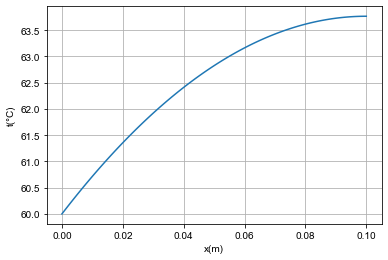

最大温度为63.77 C


In [45]:
lambda_ = 177
delta = 6e-3
L = 200e-3
I = 800 # W/m^2
t_water = 60

# 将问题看成厚度为 2*delta，高度为 L/2 的等截面直肋的换热分析，该换热为等热流密度换热
# 对厚度为dx的截面微元块分析，可知微分公式为：-lambda_ * delta * t''(x) = I

# 试试用scipy的bvp工具求解常微分方程
# 记y = t'(x)
# 定义t的导数函数，返回其1阶导数和2阶导数
N = 100


def derivative(x, t):
    return np.vstack((t[1], - I / (lambda_ * delta) * np.ones(len(t[1]))))


# 定义边界条件，t(0) = t_water, t'(L/2) = 0
# 边界条件函数的t_a和t_b参数为边界条件的起始和终止点
def bc(t_a, t_b):
    return np.array([t_a[0] - t_water, t_b[1]])


x = np.linspace(0, L/2, N)
t = np.zeros((2, x.size))
t[0, 0] = t_water
result = solve_bvp(derivative, bc, x, t)

x_plot = np.linspace(0, L/2, N)
t_plot = result.sol(x_plot)[0]
plt.plot(x_plot, t_plot)
plt.grid()
plt.xlabel('x(m)')
plt.ylabel('t(°C)')
plt.show()
print(f'最大温度为{t_plot[-1]:.2f} C')

## 习题02-59

In [46]:
delta = 15e-3
d_i = 120e-3
d_o = 140e-3
d_f = 250e-3
lambda_ = 45
t_i = 300
t_f = 20
h = 10

H_p = (d_f - d_o)/2 + delta
A_L = 2 * H_p * delta
efficiency = fin_tip_efficiency2(H_p, A_L, lambda_, h)
r_1 = d_o / 2
r_2 = d_o / 2 + H_p
area = 2 * np.pi * (r_2**2 - r_1**2)

R_tube = cylindrical_wall_R(d_i/2, d_o/2, lambda_, 2*delta)


def expressions(p):
    # 传热热阻可以看成管道导热热阻和法兰对热传热热阻的串联，流经管道和法兰的热流量相等
    Phi, t_o = p
    xpr1 = Phi - efficiency * h * area * (t_o - t_f)
    xpr2 = Phi - (t_i - t_o) / R_tube
    return xpr1, xpr2


guess_values = [1, t_i - 10]
Phi, t_o = root(expressions, guess_values).x
print(f'Phi = {Phi:.2f} W')

mH = 0.2694301256218253
Phi = 248.46 W


## 习题02-60

In [47]:
L = 8e-3
# t_0 = t_L
h = 100
lambda_ = 200
delta = 1e-3
a = 100e-3
b = 200e-3
c = 14e-3

H = L / 2
perimeter = 2 *(a + delta)
A_c = a * delta
R = fin_tip_R(H, perimeter, A_c, lambda_, h)
print(f'每片肋片的热阻为：{R:.2f} W/K')

每片肋片的热阻为：12.44 W/K


## 习题02-63

In [48]:
t_1 = 80
t_2 = 25
lambda_ = 1.5
length = 1

l = 1
d = 0.5

S = 2 * np.pi * length / (np.log(1.08 * l / d))
Phi = S * lambda_ * (t_1 - t_2)
print(f'每米长烟道上的散热量为：{Phi:.2f} W')

每米长烟道上的散热量为：673.10 W


## 习题02-65

In [49]:
delta = 300e-3
lambda_ = 0.8
t_i= 400
t_o= 50

S = 0.15 * delta
Phi = lambda_ * S * (t_i - t_o)
print(f'热损失为：{Phi:.2f} W')

热损失为：12.60 W


## 习题02-66

In [50]:
H_1 = 3
H_2 = 2
d = 500e-3
lambda_ = 1
t_s = 0
t_w = 4
length = 1

if H_1 > 2 * d:
    S_1 = 2 * np.pi * length / np.log(4 * H_1/d)
else:
    print('课本无对应公式')

Phi_1 = lambda_ * S_1 * (t_w - t_s)
print(f'每米管道的散热量为： {Phi_1:.2f} W')

# 结冰后，地下深度为1 m的土壤层的温度跟原来相同，为0摄氏度
if H_2 > 2 * d:
    S_2 = 2 * np.pi * length / np.log(4 * H_2/d)
else:
    print('课本无对应公式')

Phi_2 = lambda_ * S_2 * (t_w - t_s)
print(f'结冰后，每米管道的散热量为： {Phi_2:.2f} W')

每米管道的散热量为： 7.91 W
结冰后，每米管道的散热量为： 9.06 W


## 习题02-68

In [51]:
l_1, l_2, l_3 = 0.5, 0.75, 0.75
lambda_ = 0.02
t_i = -10
t_o = 30
Phi = 45


def expressions(p):
    delta = p
    S_corner = 4 * 0.15 * delta

    length_1 = l_1 - 2*delta
    length_2 = l_2 - 2*delta
    length_3 = l_3 - 2*delta
    length_total = 4 * length_1 + 2 * (length_2 + length_3)
    S_edge = 0.54 * length_total

    A_wall_1 = (l_1 - 2 * delta) * (l_2 - 2 * delta)
    A_wall_2 = (l_2 - 2 * delta) * (l_3 - 2 * delta)
    A_wall_3 = (l_3 - 2 * delta) * (l_1 - 2 * delta)
    A_total = 2 * (A_wall_1 + A_wall_3) + A_wall_2
    S_wall = A_total / delta

    S_total = S_corner + S_edge + S_wall
    xpr = Phi - lambda_ * S_total * (t_o - t_i)
    return xpr


guess_value = np.array([l_1 / 10])
delta = root(expressions, guess_value).x[0]
print(f'delta = {delta:.3f} m')

delta = 0.031 m


## 习题02-73

In [52]:
a = 10e-3
b = 10e-3
delta_3 = 0.02e-3
R_12c = 0.9e-4   # m^2-K/W
t_oo = 25
h = 150
q = 1.5e4   # W/m^2
lambda_3 = 236

R_1 = 1 / (h * a * b)
R_12 = R_12c / (a * b)
R_3 = delta_3 / (lambda_3 * a * b)
R_34 = 1 / (h * a * b)


def expressions(p):
    t = p[0]
    Phi_1 = (t - t_oo) / R_1
    Phi_2 = (t - t_oo) / (R_12 + R_3 + R_34)
    xpr = q * a * b - Phi_1 - Phi_2
    return xpr


guess_values = np.array([t_oo + 10])
t = root(expressions, guess_values).x[0]
print(f'芯片的工作温度为：{t:.2f} C')

芯片的工作温度为：75.34 C


## 习题02-74

In [53]:
t_i = 20
t_o = 5
h_i = 7
h_o = 28
delta_1 = 12e-3
lambda_1 = 0.16
delta_2 = 25e-3
lambda_2u = 0.141
l_2u = 75e-3
l_2d = 330e-3
fluid_2d = 'Air'
delta_3 = 200e-3
lambda_3 = 0.72


def expressions(p):
    t_12, t_23, Phi = p
    T_12 = sc.convert_temperature(t_12, 'C', 'K')
    T_23 = sc.convert_temperature(t_23, 'C', 'K')
    lambda_2d = psi('L', 'T', (T_12 + T_23)/2, 'P', sc.atm, fluid_2d)

    height = l_2u + l_2d
    area = height # 单位长度面积
    R_i = 1 / (h_i * area)
    R_1 = delta_1 / (lambda_1 * area)
    R_2u = delta_2 / (lambda_2u * l_2u)
    R_2d = delta_2 / (lambda_2d * l_2d)
    R_2 = 1 / (1/R_2u + 1/R_2d)
    R_3 = delta_3 / (lambda_3 * area)
    R_o = 1 / (h_o * area)

    R_total = R_i + R_1 + R_2 + R_3 + R_o
    # print(R_i*area, R_1*area, R_2*area, R_3*area, R_o*area, R_total*area)
    xpr1 = Phi - (t_i - t_o) / R_total
    xpr2 = t_i - t_12 - Phi * (R_i + R_1)
    xpr3 = t_i - t_23 - Phi * (R_i + R_1 + R_2)
    return [xpr1, xpr2, xpr3]


guess_values = [t_i - 1, t_i - 2, 1]
t_1, t_2, Phi = root(expressions, guess_values).x
print(f'Phi = {Phi:.2f} W')

Phi = 5.70 W


## 习题02-75

In [54]:
t_s2 = 25
t_s1 = 150
lambda_ = 15
r_2 = 35e-3
r_3 = 48e-3

R = cylindrical_wall_R(r_2, r_3, lambda_, 1)
q_r = (t_s1 - t_s2) / R
print(f'q_r = {q_r:.2f} W/m')

q_r = 37298.92 W/m


## 习题02-76

In [55]:
Q = 4000  # J/kg
time = 1 * sc.day
rho = 840
lambda_ = 0.5
h = 6
d = 80e-3
t_oo = 5
v = 0.6

Q_v = Q * rho
Phi = Q_v / time

Delta_T = sphere_Delta_T_with_heat_source(d/2, lambda_, Phi)
surface_area = np.pi * d**2
V = 4 / 3 * np.pi * (d/2)**3
t_r = t_oo + Phi * V / (h * surface_area)
t_0 = t_r + Delta_T
print(f'苹果中心温度为{t_0:.2f} C')
print(f'苹果表面温度为{t_r:.2f} C')

# # 也可以用scipy的bvp工具求解
# # 记y = t'(r)
# # 定义t的导数函数，返回其1阶导数和2阶导数
# N = 100
#
#
# def derivative(r, t):
#     return np.vstack((t[1], - 2/r * t[1] - Phi/lambda_))
#
#
# # 定义边界条件，t(0) = t_water, t'(L/2) = 0
# # 边界条件函数的t_a和t_b参数为边界条件的起始和终止点
# def bc(t_a, t_b):
#     return np.array([t_a[1], lambda_ * t_b[1] + h * (t_b[0] - t_oo)])
#
#
# r = np.linspace(0.0001, d/2, N)
# t = np.zeros((2, r.size))
# t[0, 0] = t_oo
# result = solve_bvp(derivative, bc, r, t)
#
# x_plot = np.linspace(0.0001, d/2, N)
# t_plot = result.sol(x_plot)[0]
# plt.plot(x_plot, t_plot)
# plt.grid()
# plt.xlabel('r(m)')
# plt.ylabel('t(°C)')
# plt.show()
# print(f'苹果中心温度为{t_plot[0]:.2f} C')
# print(f'苹果表面温度为{t_plot[-1]:.2f} C')

苹果中心温度为5.11 C
苹果表面温度为5.09 C


## 习题02-78

In [56]:
r = 2e-2
Phi_dot = 5650
t_o = 37
lambda_ = 0.42

Delta_T = cylinder_Delta_T_with_heat_source(r, lambda_, Phi_dot)
print(f'由于肌肉运动所造成的最大温升为{Delta_T:.2f} C')

由于肌肉运动所造成的最大温升为1.35 C


## 习题02-79

手柄传递的热流量为: 2.39 W


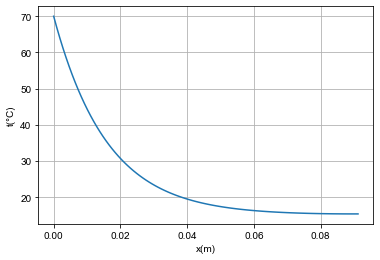

温度为35°C的位置离手柄与锅体相接部分0.017 m


In [57]:
h_i, h_o = 2, 10
d_i, d_o = 25e-3, 30e-3
H = 90e-3
t_f = 15
t_w = 70
lambda_ = 1.3  # 缺少条件，课本并未给出，这里取黏土的导热系数
t_search = 35

r_i, r_o = d_i / 2, d_o / 2
delta = r_o - r_i
H_p = H + delta/2

perimeter = np.pi * d_i + np.pi * d_o
A_c = np.pi * (r_o**2 - r_i**2)
efficiency = fin_tip_efficiency(H_p, perimeter, A_c, lambda_, 1)
area_i = np.pi * d_i * H_p
area_o = np.pi * d_o * H_p
Phi = efficiency * (h_i * area_i + h_o * area_o) * (t_w - t_f)
print(f'手柄传递的热流量为: {Phi:.2f} W')

# # 用scipy的bvp工具求解具体的温度分布
# 记y = t'(x)
# 定义t的导数函数，返回其1阶导数和2阶导数
N = 100


def derivative(x, t):
    k = 4 * (d_o*h_o + d_i*h_i) / (lambda_ * (d_o**2 - d_i**2))
    return np.vstack((t[1], k * (t[0] - t_f)))


# 定义边界条件，t(0) = t_water, t'(L/2) = 0
# 边界条件函数的t_a和t_b参数为边界条件的起始和终止点
def bc(t_a, t_b):
    return np.array([t_a[0] - t_w, t_b[1]])


x = np.linspace(0, H, N)
t = np.zeros((2, x.size))
t[0, 0] = t_w
result = solve_bvp(derivative, bc, x, t)

x_plot = np.linspace(0, H_p, N)
t_plot = result.sol(x_plot)[0]
plt.plot(x_plot, t_plot)
plt.grid()
plt.xlabel('x(m)')
plt.ylabel('t(°C)')
plt.show()

arg = find_nearest(t_plot, t_search)
print(f'温度为{t_search}°C的位置离手柄与锅体相接部分{x_plot[arg]:.3f} m')

## 习题02-80

In [58]:
r = 1.8
delta = 0.5
lambda_ = 0.15
t_oo = -40
h_o = 15
h_i = 6
t_ground = -20
Phi = 960


def expressions(p):
    t = p[0]
    area_ground = np.pi * (r**2)
    Phi_ground = h_i * area_ground * (t - t_ground)

    r_m = r + delta / 2

    R_2 = spherical_wall_R(r, r+delta, lambda_)
    R_1 = 1 / (h_i * (2 * np.pi * r**2))
    R_3 = 1 / (h_o * (2 * np.pi * (r+delta)**2))

    R_roof = R_1 + R_2 + R_3
    Phi_roof = (t - t_oo) / R_roof
    xpr = Phi_ground + Phi_roof - Phi
    return xpr


guess_value = [t_ground+1]
t = root(expressions, guess_value).x[0]
print(f'小屋内的空气平均温度为：{t:.2f} C')

小屋内的空气平均温度为：-10.73 C


## 习题02-81

In [59]:
T_av = 470
q = 2500
t_i = 65
lambda_ = [0.047, 0.012, 0.038]
delta = [0.8e-3, 0.55e-3, 3.5e-3]
delta_12 = delta_34 = 1e-3
h_rad = 4 * sc.sigma * T_av**3


def expressions(p):
    t_2, t_4, R_total = p
    R_a = delta[0] / lambda_[0]
    R_b = delta[1] / lambda_[1]
    R_c = delta[2] / lambda_[2]
    t_1 = t_i + q * R_a
    t_12 = (t_1 + t_2)/2
    lambda_12 = psi('L', 'T', t_12, 'P', sc.atm, 'Air')
    R_12cond = delta_12 / lambda_12
    R_12 = 1 / (h_rad + 1 / R_12cond)
    xpr1 = t_2 - t_1 - q * R_12
    t_3 = t_2 + q * R_b
    t_34 = (t_3 + t_4)/2
    lambda_34 = psi('L', 'T', t_34, 'P', sc.atm, 'Air')
    R_34cond = delta_34 / lambda_34
    R_34 = 1 / (h_rad + 1 / R_34cond)
    xpr2 = t_4 - t_3 - q * R_34
    xpr3 = R_total - (R_a + R_12 + R_b + R_34 + R_c)
    return xpr1, xpr2, xpr3


guess_values = [t_i+10, t_i+20, 1]
t_2, t_4, R_total = root(expressions, guess_values).x
t_o = t_i + q * R_total
print(f'外边面的温度为：{t_o:.2f} C')

外边面的温度为：569.14 C


## 习题02-86

In [60]:
t_0 = 75
t_oo = 25
h = 20
delta = 2e-3
H = 25e-3
W = 12e-2
L = 18e-2
lambda_ = 180
number = 6

H_p = H + delta/2
eta_fin = fin_tip_efficiency2(H_p, H_p*delta, lambda_, h)
print(f'肋片的效率为: {eta_fin:.2%}')
A_f = number * H_p * delta
A_r = (W - number*delta) * L
eta_overall = overall_fin_surface_efficiency(A_f, A_r, eta_fin)
print(f'肋面的总效率为: {eta_overall:.2%}')
R_overall = 1 / (h * (A_f + A_r) * eta_overall)
# 缺少条件，未知底层厚度，这里取肋片的厚度delta
R_conduction = delta / (lambda_ * W*L)
Phi = (t_0 - t_oo) / (R_overall + R_conduction)
print(f'该热沉能散发的热量为：{Phi:.2f} W')

mH = 0.2740640638812596
肋片的效率为: 97.57%
肋面的总效率为: 99.96%
该热沉能散发的热量为：19.74 W


## 习题02-87

In [61]:
t_w = 70
l_1, l_2 = 10e-2, 16e-2
H, d = 3e-2, 4.2e-2
lambda_ = 15
t_f = 20
h = 70
Phi = 80

perimeter = np.pi * d
A_c = np.pi * d**2 / 4
H_p = H + d/4  # H_p = H + A_c/perimeter
R_fin = fin_tip_R(H_p, perimeter, A_c, lambda_, h)


def expressions(p):
    number = p
    R_fins = R_fin / number
    R_base = 1 / (h * (l_1*l_2 - number*np.pi*d**2/4))
    xpr = Phi - (t_w - t_f) * (1/R_base + 1/R_fins)
    return xpr


guess_values = 1
number = root(expressions, guess_values).x[0]
print(f'需要{int(np.ceil(number))}个针肋')

需要3个针肋


## 习题02-91

In [62]:
y_list = np.array([51.2, 53.3, 54.4, 56.9, 59.5, 61.6])
x_list = np.array([5, 25, 40, 60, 75, 95])*1e-3

lambda_ = 42.8
x = 50e-3   # 题目错误，应该是50e-3
result1 = np.polyfit(x_list[:3], y_list[:3], 1)
t_50_l = np.poly1d(result1)(x)
result2 = np.polyfit(x_list[3:], y_list[3:], 1)
t_50_r = np.poly1d(result2)(x)
Delta_T = t_50_r - t_50_l

q = lambda_ * (result1[1] + result2[1]) / 2
R_c = Delta_T / q
print(f'接触热阻为：{R_c:.2e} m^2-K/W')

接触热阻为：1.73e-04 m^2-K/W


## 习题02-92

当空气流速为0.6 m/s时，散热量为：272.92 W
当空气流速为1.0 m/s时，散热量为：370.73 W
当空气流速为1.5 m/s时，散热量为：469.95 W
当空气流速为2.0 m/s时，散热量为：553.95 W
当空气流速为2.5 m/s时，散热量为：627.76 W


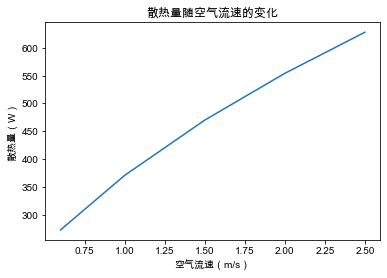

In [63]:
d = 7.5e-3
distance = 10e-3
t_f = 25
t_w = 120
W = 10e-2

L = 6e-2  # 圆柱的高度。缺少条件，这里自己取的6 cm。
lambda_ = 180  # 导热系数。缺少条件，这里自己取的180 W/(m-K)。


def h(u):
    return 5.12 * u**0.65 / d**0.35


u = np.array([0.6, 1.0, 1.5, 2.0, 2.5])
h = h(u)

perimeter = np.pi * d
A_c = np.pi * (d/2)**2
H_p = L + A_c / perimeter
eta_fin = fin_tip_efficiency(H_p, perimeter, A_c, lambda_, h)
# print(f'肋片的效率为: {eta_fin:.2%}')
number = 10*10
A_f = number * H_p * perimeter
A_r = W*W - number*A_c
eta_overall = overall_fin_surface_efficiency(A_f, A_r, eta_fin)
# print(f'肋面的总效率为: {eta_overall:.2%}')
R_overall = 1 / (h * (A_f + A_r) * eta_overall)
Phi = (t_w - t_f) / R_overall
[print(f'当空气流速为{speed} m/s时，散热量为：{phi:.2f} W') for (speed, phi) in zip(u, Phi)]

fig, ax = plt.subplots()
ax.plot(u, Phi)
ax.set_xlabel('空气流速（m/s）')
ax.set_ylabel('散热量（W）')
ax.set_title('散热量随空气流速的变化')
plt.show()

## 习题02-93

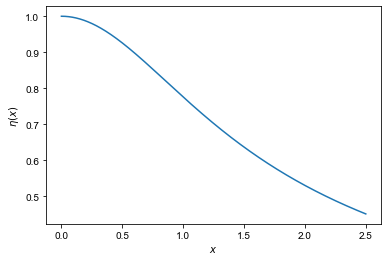

In [64]:
delta = 0.0001
x = np.linspace(delta, 2.5, 1000)
mH = np.sqrt(2) * x
I_0 = iv(0, 2*mH)
I_1 = iv(1, 2*mH)
I_2 = iv(2, 2*mH)
eta = 2 / mH * I_2 / I_1
fig, ax = plt.subplots()
ax.plot(x, eta)
ax.set_xlabel('$x$')
ax.set_ylabel('$\eta(x)$')
plt.show()